In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset.sentinel import *
from models.lstm_ae import *
from models.conv_ae import *
import torch
import random
from torchvision.transforms import transforms as T
from config import *
from esa.utils import *
from esa.conv_utils import *

import platform

import numpy as np
from omegaconf import OmegaConf
from notebook_utils import launch_train_advice

architecture = 'conv_ae'
os.environ['architecture'] = architecture
config_file = os.path.join(conf_path, architecture+'.yaml')
cfg = OmegaConf.load(config_file)
cfg.dataset.out_window = cfg.dataset.sequence_length

In [9]:
model_list = os.listdir(model_results+ '{}/'.format(architecture))
for ix, mn in enumerate(model_list):  
    print('model num {}: {}'.format(ix,model_list[ix]))

model num 0: conv_ae_sl_16_filter_n_64_kernel_size_3_22_03_2023_15:20:19.pth


In [10]:
launch_train_advice(cfg, model_list, config_file)

to train a model  switch train_model to True  in the next cell
to train a new model from scratch set train_model to True in the next cell

check the configuration file in /home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/configuration/conv_ae.yaml to set the hyperparameters of the model

actual dataset configuration is {'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 500, 'sampling_rate': '4s', 'scaled': 1, 'target': None, 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16}

actual architecture configuration is {'architecture': 'conv_ae', 'increasing': 0, 'flattened': 1, 'latent_dim': 100, 's

In [12]:
train_model = True

In [13]:
if train_model:
    !python ../main.py --config_name $architecture

now = 2023-03-23 11:33:39.044506
Initializing conv2d weights with Kaiming He normal
Initializing conv2d weights with Kaiming He normal
  0%|                                               | 0/1400 [00:00<?, ?batch/s]Loss:
1.3221806287765503

  1%|▎                                     | 10/1400 [00:01<03:12,  7.21batch/s]Loss:
0.8079594969749451

  1%|▌                                     | 20/1400 [00:03<02:54,  7.89batch/s]Loss:
0.6808562278747559

  2%|▊                                     | 30/1400 [00:04<03:07,  7.31batch/s]Loss:
0.6013644933700562

  3%|█                                     | 40/1400 [00:05<02:56,  7.68batch/s]Loss:
0.553129255771637

  4%|█▎                                    | 50/1400 [00:07<03:00,  7.47batch/s]Loss:
0.5162167549133301

  4%|█▋                                    | 60/1400 [00:08<03:03,  7.29batch/s]Loss:
0.48177120089530945

  5%|█▉                                    | 70/1400 [00:09<02:58,  7.46batch/s]Loss:
0.46408528089523315

  6%|██▏        

  7%|██▋                                  | 100/1400 [00:13<02:54,  7.43batch/s]Loss:
0.3967353105545044

  8%|██▉                                  | 110/1400 [00:15<02:44,  7.85batch/s]Loss:
0.4070890247821808

  9%|███▏                                 | 120/1400 [00:16<02:57,  7.21batch/s]Loss:
0.394696980714798

  9%|███▍                                 | 130/1400 [00:17<02:51,  7.39batch/s]Loss:
0.39061540365219116

 10%|███▋                                 | 140/1400 [00:19<02:54,  7.23batch/s]Loss:
0.38335952162742615

 11%|███▉                                 | 150/1400 [00:20<02:44,  7.60batch/s]Loss:
0.35273978114128113

 11%|████▏                                | 160/1400 [00:21<02:38,  7.82batch/s]Loss:
0.34176144003868103

 12%|████▍                                | 170/1400 [00:23<02:44,  7.46batch/s]Loss:
0.3399435877799988

 13%|████▊                                | 180/1400 [00:24<02:43,  7.45batch/s]Loss:
0.3389124870300293

 13%|████▊                                |

 14%|█████                                | 190/1400 [00:25<02:37,  7.70batch/s]Loss:
0.3433373272418976

 14%|█████▎                               | 200/1400 [00:27<02:45,  7.23batch/s]Loss:
0.3302551805973053

 15%|█████▌                               | 210/1400 [00:28<02:33,  7.74batch/s]Loss:
0.33099085092544556

 16%|█████▊                               | 220/1400 [00:29<02:37,  7.51batch/s]Loss:
0.31866374611854553

 16%|██████                               | 230/1400 [00:31<02:32,  7.66batch/s]Loss:
0.31250303983688354

 17%|██████▎                              | 240/1400 [00:32<02:26,  7.91batch/s]Loss:
0.3112844228744507

 18%|██████▌                              | 250/1400 [00:33<02:48,  6.84batch/s]Loss:
0.3101402521133423

 19%|██████▊                              | 260/1400 [00:35<02:34,  7.40batch/s]Loss:
0.2994157373905182

 19%|███████▏                             | 270/1400 [00:36<02:40,  7.04batch/s]Loss:
0.30684909224510193

 20%|███████▎                             

 20%|███████▍                             | 280/1400 [00:37<02:29,  7.49batch/s]Loss:
0.2968566119670868

 21%|███████▋                             | 290/1400 [00:39<02:25,  7.64batch/s]Loss:
0.30281367897987366

 21%|███████▉                             | 300/1400 [00:40<02:17,  8.01batch/s]Loss:
0.30675506591796875

 22%|████████▏                            | 310/1400 [00:41<02:27,  7.37batch/s]Loss:
0.3003031313419342

 23%|████████▍                            | 320/1400 [00:43<02:26,  7.39batch/s]Loss:
0.30018728971481323

 24%|████████▋                            | 330/1400 [00:44<02:27,  7.24batch/s]Loss:
0.292532742023468

 24%|████████▉                            | 340/1400 [00:45<02:24,  7.32batch/s]Loss:
0.2865554988384247

 25%|█████████▎                           | 350/1400 [00:47<02:27,  7.10batch/s]Loss:
0.2889014482498169

 26%|█████████▌                           | 360/1400 [00:48<02:35,  6.70batch/s]Loss:
0.2905513644218445

 26%|█████████▊                           | 

 27%|██████████                           | 380/1400 [00:51<02:25,  7.02batch/s]Loss:
0.26373496651649475

 28%|██████████▎                          | 390/1400 [00:52<02:14,  7.51batch/s]Loss:
0.26892900466918945

 29%|██████████▌                          | 400/1400 [00:54<02:14,  7.45batch/s]Loss:
0.2656897008419037

 29%|██████████▊                          | 410/1400 [00:55<02:21,  7.01batch/s]Loss:
0.27309519052505493

 30%|███████████                          | 420/1400 [00:57<02:17,  7.10batch/s]Loss:
0.27462780475616455

 31%|███████████▎                         | 430/1400 [00:58<02:17,  7.07batch/s]Loss:
0.27792078256607056

 31%|███████████▋                         | 440/1400 [00:59<02:17,  6.97batch/s]Loss:
0.2716706395149231

 32%|███████████▉                         | 450/1400 [01:01<02:07,  7.44batch/s]Loss:
0.265377938747406

 33%|████████████▏                        | 460/1400 [01:02<02:06,  7.43batch/s]Loss:
0.2607807517051697

 33%|████████████▎                        

 34%|████████████▍                        | 470/1400 [01:04<02:03,  7.55batch/s]Loss:
0.2550588548183441

 34%|████████████▋                        | 480/1400 [01:05<02:08,  7.18batch/s]Loss:
0.2342333048582077

 35%|████████████▉                        | 490/1400 [01:06<02:04,  7.29batch/s]Loss:
0.2542048692703247

 36%|█████████████▏                       | 500/1400 [01:08<02:02,  7.34batch/s]Loss:
0.24480211734771729

 36%|█████████████▍                       | 510/1400 [01:09<02:06,  7.03batch/s]Loss:
0.24009311199188232

 37%|█████████████▋                       | 520/1400 [01:10<02:02,  7.16batch/s]Loss:
0.23116573691368103

 38%|██████████████                       | 530/1400 [01:12<02:02,  7.11batch/s]Loss:
0.23426903784275055

 39%|██████████████▎                      | 540/1400 [01:13<01:58,  7.23batch/s]Loss:
0.23958739638328552

 39%|██████████████▌                      | 550/1400 [01:15<01:59,  7.10batch/s]Loss:
0.24192894995212555

 40%|██████████████▊                    

 41%|███████████████                      | 570/1400 [01:17<01:46,  7.76batch/s]Loss:
0.23790006339550018

 41%|███████████████▎                     | 580/1400 [01:19<01:50,  7.41batch/s]Loss:
0.22327697277069092

 42%|███████████████▌                     | 590/1400 [01:20<01:54,  7.10batch/s]Loss:
0.20991671085357666

 43%|███████████████▊                     | 600/1400 [01:22<01:53,  7.07batch/s]Loss:
0.2154739946126938

 44%|████████████████                     | 610/1400 [01:23<01:46,  7.39batch/s]Loss:
0.21146011352539062

 44%|████████████████▍                    | 620/1400 [01:24<01:42,  7.57batch/s]Loss:
0.21320363879203796

 45%|████████████████▋                    | 630/1400 [01:26<01:51,  6.91batch/s]Loss:
0.20635592937469482

 46%|████████████████▉                    | 640/1400 [01:27<01:43,  7.36batch/s]Loss:
0.20192267000675201

 46%|█████████████████▏                   | 650/1400 [01:28<01:44,  7.18batch/s]Loss:
0.20851126313209534

 47%|█████████████████▎               

 47%|█████████████████▍                   | 660/1400 [01:30<01:41,  7.30batch/s]Loss:
0.21804022789001465

 48%|█████████████████▋                   | 670/1400 [01:31<01:41,  7.16batch/s]Loss:
0.213323175907135

 49%|█████████████████▉                   | 680/1400 [01:33<01:38,  7.29batch/s]Loss:
0.2152848243713379

 49%|██████████████████▏                  | 690/1400 [01:34<01:37,  7.29batch/s]Loss:
0.21612513065338135

 50%|██████████████████▌                  | 700/1400 [01:35<01:39,  7.01batch/s]Loss:
0.20810739696025848

 51%|██████████████████▊                  | 710/1400 [01:37<01:40,  6.89batch/s]Loss:
0.2001466304063797

 51%|███████████████████                  | 720/1400 [01:38<01:36,  7.08batch/s]Loss:
0.2100529819726944

 52%|███████████████████▎                 | 730/1400 [01:40<01:37,  6.87batch/s]Loss:
0.19964861869812012

 53%|███████████████████▌                 | 740/1400 [01:41<01:31,  7.20batch/s]Loss:
0.20612402260303497

 53%|███████████████████▊                 

 54%|███████████████████▊                 | 750/1400 [01:42<01:31,  7.12batch/s]Loss:
0.19054913520812988

 54%|████████████████████                 | 760/1400 [01:44<01:27,  7.32batch/s]Loss:
0.22442536056041718

 55%|████████████████████▎                | 770/1400 [01:45<01:28,  7.13batch/s]Loss:
0.20364892482757568

 56%|████████████████████▌                | 780/1400 [01:46<01:25,  7.27batch/s]Loss:
0.20370011031627655

 56%|████████████████████▉                | 790/1400 [01:48<01:26,  7.04batch/s]Loss:
0.18975570797920227

 57%|█████████████████████▏               | 800/1400 [01:49<01:25,  7.05batch/s]Loss:
0.20218661427497864

 58%|█████████████████████▍               | 810/1400 [01:51<01:18,  7.51batch/s]Loss:
0.1909472793340683

 59%|█████████████████████▋               | 820/1400 [01:52<01:20,  7.23batch/s]Loss:
0.20075784623622894

 59%|█████████████████████▉               | 830/1400 [01:53<01:12,  7.90batch/s]Loss:
0.18037469685077667

 60%|██████████████████████▏          

 61%|██████████████████████▍              | 850/1400 [01:56<01:18,  7.04batch/s]Loss:
0.19680523872375488

 61%|██████████████████████▋              | 860/1400 [01:58<01:16,  7.06batch/s]Loss:
0.18710537254810333

 62%|██████████████████████▉              | 870/1400 [01:59<01:16,  6.91batch/s]Loss:
0.18276555836200714

 63%|███████████████████████▎             | 880/1400 [02:00<01:14,  7.02batch/s]Loss:
0.1816592961549759

 64%|███████████████████████▌             | 890/1400 [02:02<01:12,  7.08batch/s]Loss:
0.18018262088298798

 64%|███████████████████████▊             | 900/1400 [02:03<01:11,  7.03batch/s]Loss:
0.18486689031124115

 65%|████████████████████████             | 910/1400 [02:05<01:06,  7.38batch/s]Loss:
0.19163180887699127

 66%|████████████████████████▎            | 920/1400 [02:06<01:10,  6.80batch/s]Loss:
0.1931677758693695

 66%|████████████████████████▌            | 930/1400 [02:07<01:09,  6.73batch/s]Loss:
0.1878432333469391

 67%|████████████████████████▋          

 67%|████████████████████████▊            | 940/1400 [02:09<01:05,  7.00batch/s]Loss:
0.18668515980243683

 68%|█████████████████████████            | 950/1400 [02:10<01:05,  6.92batch/s]Loss:
0.17289738357067108

 69%|█████████████████████████▎           | 960/1400 [02:12<01:02,  6.99batch/s]Loss:
0.19488012790679932

 69%|█████████████████████████▋           | 970/1400 [02:13<01:00,  7.14batch/s]Loss:
0.19890974462032318

 70%|█████████████████████████▉           | 980/1400 [02:15<00:56,  7.41batch/s]Loss:
0.17884720861911774

 71%|██████████████████████████▏          | 990/1400 [02:16<00:54,  7.48batch/s]Loss:
0.19127751886844635

 71%|█████████████████████████▋          | 1000/1400 [02:17<00:54,  7.28batch/s]Loss:
0.194809690117836

 72%|█████████████████████████▉          | 1010/1400 [02:19<00:56,  6.94batch/s]Loss:
0.18126721680164337

 73%|██████████████████████████▏         | 1020/1400 [02:20<00:51,  7.35batch/s]Loss:
0.18978890776634216

 74%|██████████████████████████▍       

 74%|██████████████████████████▋         | 1040/1400 [02:23<00:48,  7.38batch/s]Loss:
0.18848267197608948

 75%|███████████████████████████         | 1050/1400 [02:24<00:51,  6.77batch/s]Loss:
0.18223261833190918

 76%|███████████████████████████▎        | 1060/1400 [02:26<00:47,  7.19batch/s]Loss:
0.1925458014011383

 76%|███████████████████████████▌        | 1070/1400 [02:27<00:43,  7.61batch/s]Loss:
0.16895335912704468

 77%|███████████████████████████▊        | 1080/1400 [02:28<00:44,  7.19batch/s]Loss:
0.19799895584583282

 78%|████████████████████████████        | 1090/1400 [02:30<00:45,  6.82batch/s]Loss:
0.1877569854259491

 79%|████████████████████████████▎       | 1100/1400 [02:31<00:42,  7.04batch/s]Loss:
0.17719346284866333

 79%|████████████████████████████▌       | 1110/1400 [02:33<00:42,  6.87batch/s]Loss:
0.18693840503692627

 80%|████████████████████████████▊       | 1120/1400 [02:34<00:38,  7.22batch/s]Loss:
0.18728207051753998

 80%|████████████████████████████▉     

 81%|█████████████████████████████       | 1130/1400 [02:36<00:39,  6.87batch/s]Loss:
0.1874527633190155

 81%|█████████████████████████████▎      | 1140/1400 [02:37<00:35,  7.33batch/s]Loss:
0.1920301467180252

 82%|█████████████████████████████▌      | 1150/1400 [02:38<00:34,  7.25batch/s]Loss:
0.18236693739891052

 83%|█████████████████████████████▊      | 1160/1400 [02:40<00:33,  7.16batch/s]Loss:
0.18050432205200195

 84%|██████████████████████████████      | 1170/1400 [02:41<00:33,  6.95batch/s]Loss:
0.17998312413692474

 84%|██████████████████████████████▎     | 1180/1400 [02:42<00:29,  7.34batch/s]Loss:
0.19326448440551758

 85%|██████████████████████████████▌     | 1190/1400 [02:44<00:28,  7.38batch/s]Loss:
0.17468848824501038

 86%|██████████████████████████████▊     | 1200/1400 [02:45<00:27,  7.33batch/s]Loss:
0.182472363114357

 86%|███████████████████████████████     | 1210/1400 [02:47<00:25,  7.32batch/s]Loss:
0.17608340084552765

 87%|███████████████████████████████▎    

 87%|███████████████████████████████▎    | 1220/1400 [02:48<00:23,  7.51batch/s]Loss:
0.1856907159090042

 88%|███████████████████████████████▋    | 1230/1400 [02:49<00:22,  7.52batch/s]Loss:
0.18440519273281097

 89%|███████████████████████████████▉    | 1240/1400 [02:51<00:21,  7.53batch/s]Loss:
0.17542333900928497

 89%|████████████████████████████████▏   | 1250/1400 [02:52<00:19,  7.54batch/s]Loss:
0.17897413671016693

 90%|████████████████████████████████▍   | 1260/1400 [02:53<00:18,  7.42batch/s]Loss:
0.1892206072807312

 91%|████████████████████████████████▋   | 1270/1400 [02:55<00:17,  7.60batch/s]Loss:
0.18140681087970734

 91%|████████████████████████████████▉   | 1280/1400 [02:56<00:16,  7.44batch/s]Loss:
0.17780055105686188

 92%|█████████████████████████████████▏  | 1290/1400 [02:57<00:15,  7.22batch/s]Loss:
0.1772458553314209

 93%|█████████████████████████████████▍  | 1300/1400 [02:59<00:13,  7.45batch/s]Loss:
0.1717914491891861

 94%|█████████████████████████████████▋  

 94%|█████████████████████████████████▉  | 1320/1400 [03:02<00:11,  7.09batch/s]Loss:
0.17234836518764496

 95%|██████████████████████████████████▏ | 1330/1400 [03:03<00:09,  7.71batch/s]Loss:
0.1798843890428543

 96%|██████████████████████████████████▍ | 1340/1400 [03:04<00:08,  7.28batch/s]Loss:
0.18111293017864227

 96%|██████████████████████████████████▋ | 1350/1400 [03:06<00:06,  7.27batch/s]Loss:
0.17739158868789673

 97%|██████████████████████████████████▉ | 1360/1400 [03:07<00:05,  7.04batch/s]Loss:
0.17629016935825348

 98%|███████████████████████████████████▏| 1370/1400 [03:08<00:04,  7.00batch/s]Loss:
0.16516506671905518

 99%|███████████████████████████████████▍| 1380/1400 [03:10<00:02,  6.79batch/s]Loss:
0.17331695556640625

 99%|███████████████████████████████████▋| 1390/1400 [03:11<00:01,  7.15batch/s]Loss:
0.17860201001167297

100%|████████████████████████████████████| 1400/1400 [03:13<00:00,  7.24batch/s]
train loss at the end of epoch is  0.25259894292269436

Evaluati

Evaluating:  35%|██████████                   | 208/600 [00:12<00:21, 18.22it/s]


Evaluating:  68%|███████████████████▊         | 411/600 [00:23<00:09, 19.23it/s]


Evaluating: 100%|█████████████████████████████| 600/600 [00:33<00:00, 18.12it/s]
eval loss 0.18530430735399325
val_loss improved from 10000000000000000 to 0.18530430735399325, saving model  conv_ae_sl_16_filter_n_64_kernel_size_3_23_03_2023_11:33:39 to /home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/model_results/conv_ae
  0%|                                               | 0/1400 [00:00<?, ?batch/s]Loss:
0.17091551423072815

  0%|▏                                      | 7/1400 [00:01<03:48,  6.10batch/s]


  1%|▎                                     | 10/1400 [00:02<03:24,  6.80batch/s]Loss:
0.17382816970348358

  0%|▏                                   | 1/200 [03:49<12:42:24, 229.87s/epoch]
Traceback (most recent call last):
  File "/home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/notebook/../main.py", line 91, in <module>
    main(args)
  File "/home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/notebook/../main.py", line 83, in main
    start_train(cfg, param_conf, train_iter, test_iter, device, checkpoint_path, model_name)
  File "/home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/utils/training.py", line 168, in start_train
    train_conv_ae(param_conf, train_iter, test_iter, model, criterion, optimizer, scheduler, device,
  File "/home/roberto/Documents/backup_rob/repo/esa_fdir/time_series_anomaly_detection/models/conv_ae.py", line 193, in train_conv_ae
    y_o = model(batch[0].to(device))
  File "/

In [ ]:
if train_model:
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))

In [11]:
selected_model = 0
print(model_list[selected_model])
model_name = model_list[selected_model].split('.')[0]

conv_ae_sl_16_filter_n_64_kernel_size_3_22_03_2023_15:20:19.pth


In [8]:
try:
    sm = str(torch.cuda.get_device_capability())
    sm = ''.join((sm.strip('()').split(',')[0], sm.strip('()').split(',')[1])).replace(' ', '')
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda and sm in torch.cuda.get_arch_list() else "cpu")
except:
    device='cpu'

In [9]:
checkpoint  = torch.load(model_results+ '{}/'.format(architecture) + '/' + model_list[selected_model]
                         , map_location=device)
params_conf = checkpoint['param_conf']

In [13]:
cols = params_conf['columns']
sequence_length = params_conf['sequence_length']
batch_size = params_conf['batch_size']
predict = params_conf['predict']

out_window = params_conf['out_window']

n_features = params_conf['n_features']
scaled = params_conf['scaled']
sampling_rate = params_conf['sampling_rate']

columns_subset = params_conf['columns_subset']
dataset_subset = params_conf['dataset_subset']

dataset = params_conf['name']
train_val_split = params_conf['train_val_split']

target = params_conf['target']
batch_size = params_conf['batch_size']
sequence_length = params_conf['sequence_length']
out_window = params_conf['out_window']
predict = params_conf['predict']
activation = params_conf['activation']
kernel_size = params_conf['kernel_size']
filter_num = params_conf['filter_num']
latent_dim = params_conf['latent_dim']
n_layers = params_conf['n_layers']

data_path = params_conf['data_path']

In [14]:
model = CONV_AE(in_channel=1,heigth=sequence_length, width=len(columns),
                        kernel_size=kernel_size, filter_num=filter_num,
                 latent_dim=latent_dim, \
        n_layers=n_layers, activation = activation).to(device)

model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
par_nums = count_parameters(model)
print('number of params', par_nums)

Initializing conv2d weights with Kaiming He normal
Initializing conv2d weights with Kaiming He normal
number of params 47705


In [15]:
transform = T.Compose([T.ToTensor()])
dataset_name = os.path.join(data_path.strip('..'), "all_2016-2018_clean_std_4s.pkl")
df_train, df_test, train_iter, test_iter = \
read_dataset_conv(dataset_name, params_conf['scaled'],params_conf['columns_subset']
                  , params_conf['dataset_subset'], params_conf['columns'], 
                 params_conf['train_val_split'], params_conf['sequence_length']
                  ,params_conf['sequence_length'],  predict=False,
                 batch_size=4, transform=transform )

In [17]:
compute_mse_val_loss = False

In [18]:
mse_val_loss_list = []
criterion = nn.MSELoss()
if compute_mse_val_loss:
    for i, (x,y) in enumerate(test_iter):
        yo = model(x)
        mse_val_loss_list.append(criterion(yo, x).item())
    mse_val_loss = np.mean(mse_val_loss_list)
    print(mse_val_loss)

In [20]:
num_batch = 10
inject_anomalies = False

if inject_anomalies:
    x, shift = unrolling_batches_conv_with_anomalies(num_batch=num_batch, test_iter=test_iter, sigma=3,
                             sequence_length=sequence_length, cols=cols, shift = None)
else:
    x, shift = unrolling_batches_conv(num_batch=num_batch, test_iter=test_iter, 
                         sequence_length=sequence_length, cols=cols, shift = None)
    
print('time horizon', num_batch*params_conf['sequence_length'])

time horizon 160


In [21]:
yo = model(x.to(device)).squeeze()
if inject_anomalies:
    ya = model(xa.to(device)).squeeze()
save = False

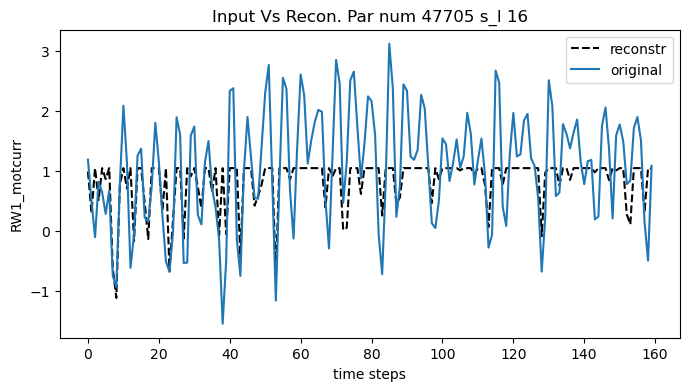

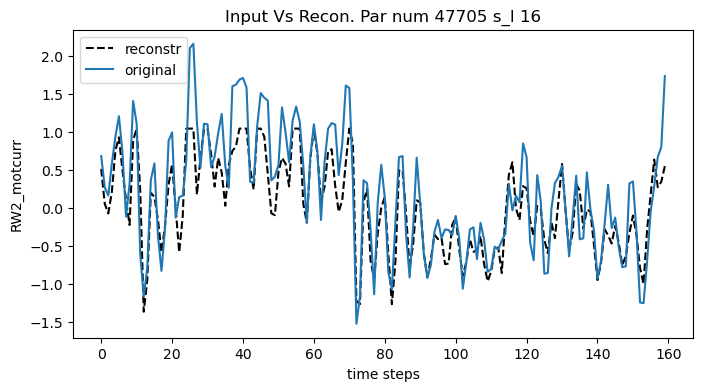

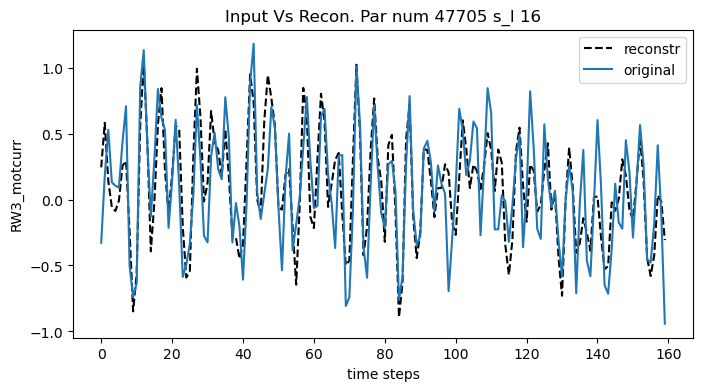

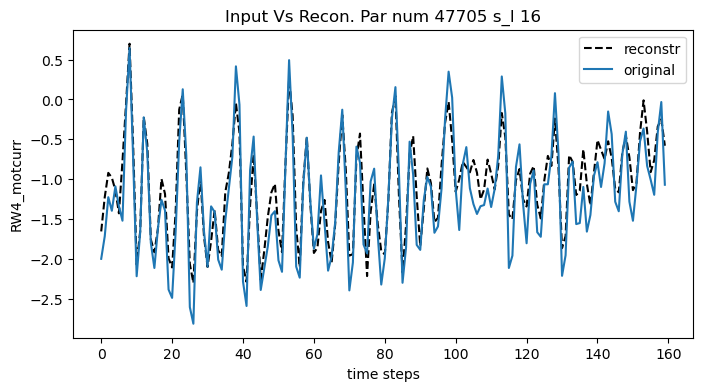

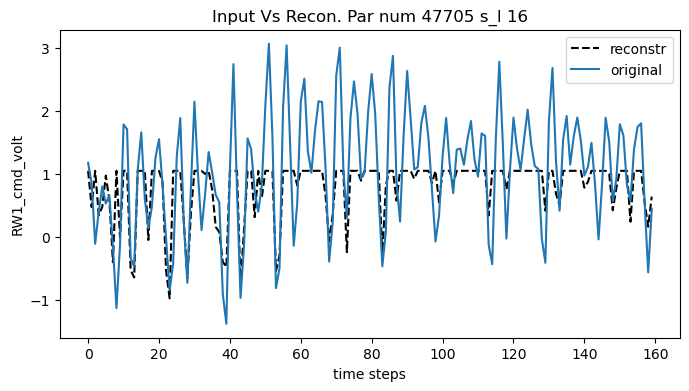

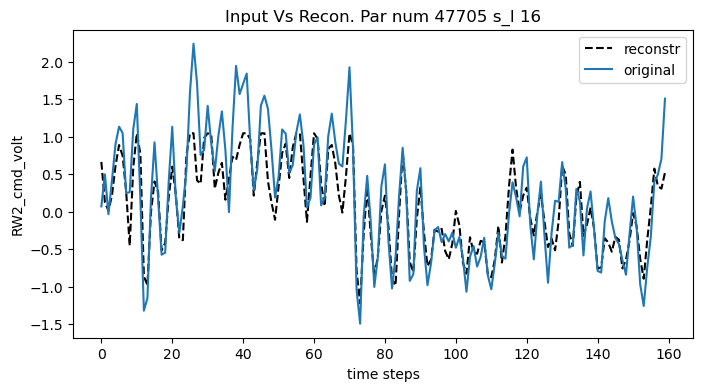

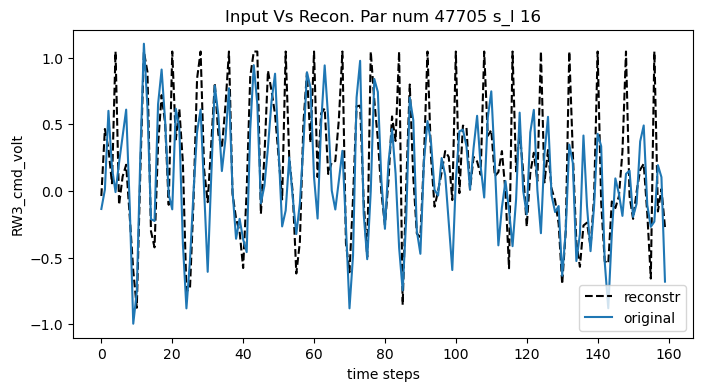

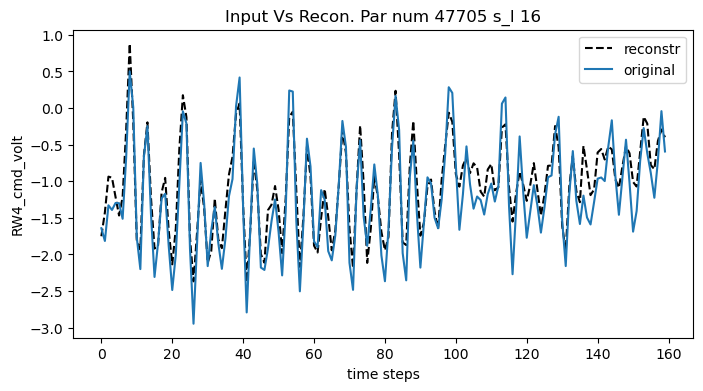

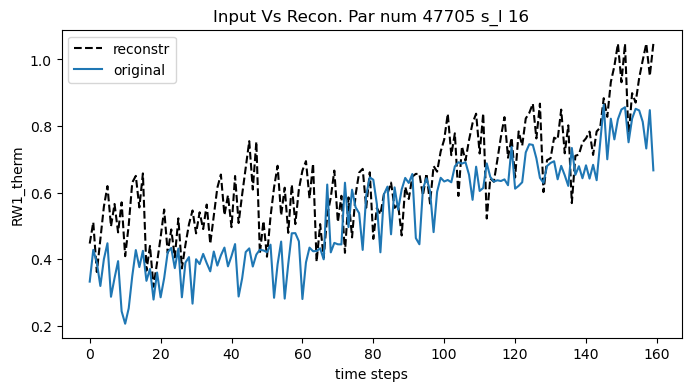

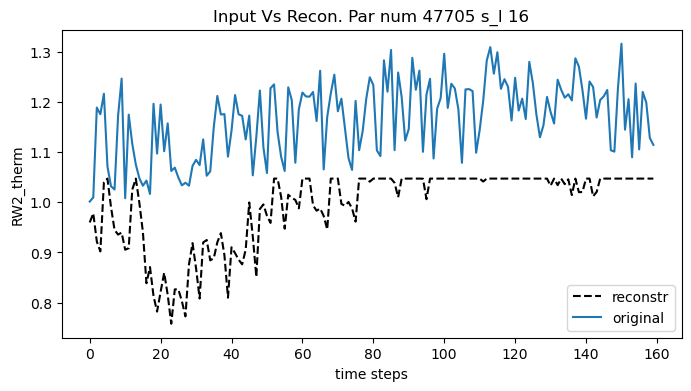

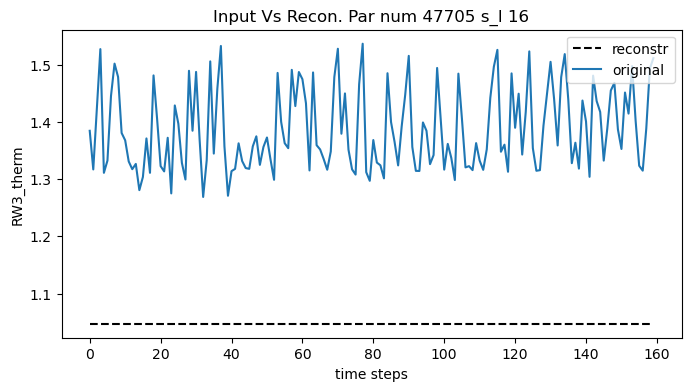

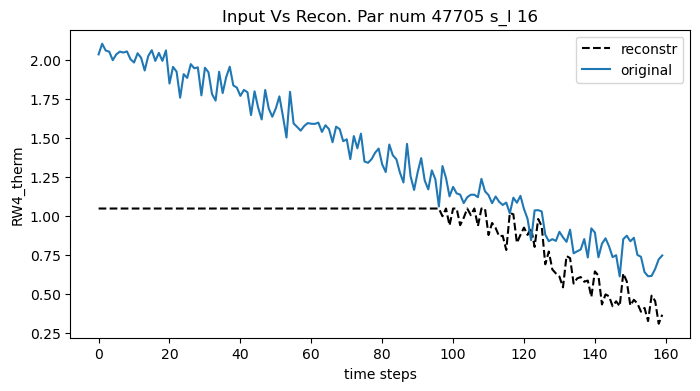

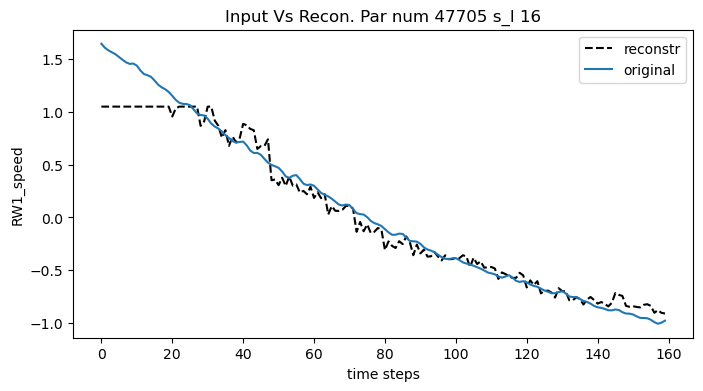

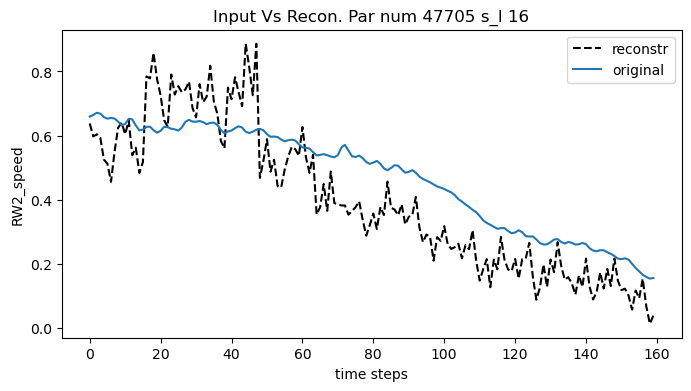

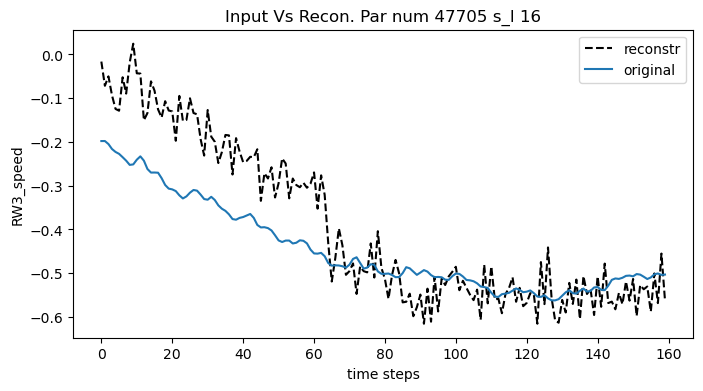

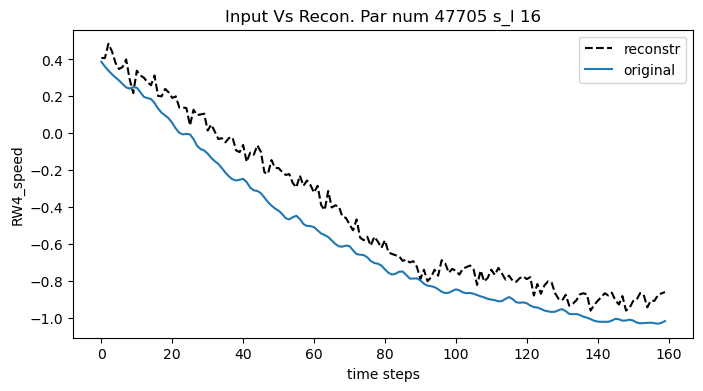

In [22]:
x_plot = x.squeeze().to(device)

show_results(x_plot , yo, cols, model_name, params_conf
     , par_nums, shift, num_batch,arch=architecture,save=False)